In [1]:
#Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.datasets import make_blobs #used to generate the data points

In [2]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLNE = '\033[4m'
    END = '\033[0m'

In [3]:
def plot_data(X):
    plt.figure(figsize=(7.5,6))
    for i in range(len(X)):
        plt.scatter(X[i][0],X[i][1],color='k')   

In [4]:
#Initially assigns a random data points as centroids for the clusters
def random_centroid(X,k):
    #Creating k random indices and using the data point at that indices as centroid 
    random_idx=[np.random.randint(len(X)) for i in range(k)]
    centroids=[]
    for i in random_idx:
        centroids.append(X[i])
    return centroids

In [5]:
#Determines which date point goes to which cluster
def assign_cluster(X,ini_centroids,k):
    cluster=[] #to store the data point's corresponding cluster number
    #for every point in X
    for i in range(len(X)):
        euc_dist=[] # to store the distance between the centroid and data point
        #Running k loops
        for j in range(k):
            euc_dist.append(np.linalg.norm(np.subtract(X[i],ini_centroids[j]))) #appending the distance into the array
        idx=np.argmin(euc_dist) #returns the index where the value is minimum
        cluster.append(idx) #appends the index to the cluster array
    return np.asarray(cluster)

In [6]:
#Returns the updated centroid
def compute_centroid(X,clusters,k):
    centroid = [] #stores the centroid values
    for i in range(k):
        temp_arr=[]
        for j in range(len(X)):
            #checking one cluster at once and storing the respective cluster data points in the temp_arr
            if clusters[j]==i:
                temp_arr.append(X[j])
        #taking mean among those points and storing it in the centroid array
        centroid.append(np.mean(temp_arr,axis=0))
    return np.asarray(centroid)

In [7]:
#Return the difference between the previous centroid and the newly computed centroid
def difference(prev,nxt):
    diff=0
    for i in range(len(prev)):
        diff+=np.linalg.norm(prev[i]-nxt[i])
    return diff

In [8]:
# Used to plot in each iteration
def show_clusters(X,clusters,centroids,ini_centroids,mark_centroid=True,show_ini_centroid=True,show_plots=True):
    #assigning specific color to each cluster. Assuming 3 for now
    cols={0:'r',1:'b',2:'g',3:'coral',4:'c',5:'lime'}
    fig,ax=plt.subplots(figsize=(7.5,6));
    #plots every cluster points
    for i in range(len(clusters)):
        ax.scatter(X[i][0],X[i][1],color=cols[clusters[i]])
    #plots all the centroids
    for j in range(len(centroids)):
        ax.scatter(centroids[j][0],centroids[j][1],marker='*',color=cols[j])
        if show_ini_centroid==True:
            ax.scatter(ini_centroids[j][0],ini_centroids[j][1],marker="+",s=150,color=cols[j])
    #used to mark the centroid by drawing a circle around it
    if mark_centroid==True:
        for i in range(len(centroids)):
            ax.add_artist(plt.Circle((centroids[i][0],centroids[i][1]),0.4,linewidth=2,fill=False))
            if show_ini_centroid==True:
                ax.add_artist(plt.Circle((ini_centroids[i][0],ini_centroids[i][1]),0.4,linewidth=2,color='y',fill=False))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("K-means Clustering")
    if show_plots==True:
        plt.show()

In [9]:
"""
Initial Centroid is marked with plus marker and yellow circle
Final Centroid is marked with * marker and black circle

"""
#Used to perform k means clustering
#if show type input is not given then it will show plot for each loop
def k_means(X,k,show_type='all',show_plots=True):
    c_prev=random_centroid(X,k)#initially assign a random centroid
    cluster=assign_cluster(X,c_prev,k) #to store the cluster number of the data point
    diff = 100 #assuming that the initial difference between the centroids is 100
    ini_centroid = c_prev; #storing the initial centroid values
    
    print(color.BOLD+"NOTE:\n + and Yellow Circle -> Initial Centroid\n * andBlack Circle -> Final Centroid"+color.END)
    
    #stops if the difference is less than 0.001
    if show_plots:
        print(color.BOLD+"\n\nInitial Plot:\n"+color.END)
        show_clusters(X,cluster,c_prev,ini_centroid,show_plots=show_plots)
    while diff>0.0001:
        cluster = assign_cluster(X,c_prev,k) #assigns the data point to respective clusters
        #plotting the initial graph
        if show_type=='all' and show_plots:
            show_clusters(X,cluster,c_prev,ini_centroid,False,False,show_plots=show_plots)
            mark_centroid=False #Not to mark the centroids for other plots
            show_ini_centroid=False #Not to mark the initail centroid for all
        c_new = compute_centroid(X,cluster,k) # to compute the new centroid point
        diff = difference(c_prev,c_new) #to compute the difference between the centroids
        c_prev=c_new # now new centroid becomes current centroid point
    
    #Final cluster centers
    if show_plots:
        print(color.BOLD+"\nInitial Cluster Centers:\n"+color.END)
        print(ini_centroid)
        print(color.BOLD+"\nFinal Cluster Centers:\n"+color.END)
        print(c_prev)
        #Plotting the final plot
        print(color.BOLD+"\n\nFinal Plot:\n"+color.END) 
        show_clusters(X,cluster,c_prev,ini_centroid,mark_centroid=True,show_ini_centroid=True)    
    return cluster,c_prev
        

In [10]:
def validate(original_clus,my_clus,k):
    ori_grp=[]
    my_grp=[]
    for i in range(k):
        temp=[]
        temp1=[]
        for j in range(len(my_clus)):
            if my_clus[j]==i:
                temp.append(j)
            if original_clus[j]==i:
                temp1.append(j)
        my_grp.append(temp)
        ori_grp.append(temp1)
    same_bool=True
    for f in range(len(ori_grp)):
        if my_grp[f] not in ori_grp:
            print(color.BOLD+"Not Same"+color.END)
            same_bool=False
            break;
    if same_bool:
        print(color.BOLD+"Both the clusters are equal"+color.END)

In [11]:
k=3
X,original_clus = make_blobs(n_samples=50, centers=3, n_features=2, random_state=20)
#here 2nd output is the array of values indicating the data points' cluster group based on centers

Why I used make_blobs?
Since the second output from the make_blobs tells us which data point goes to which cluster (based on number of centers)

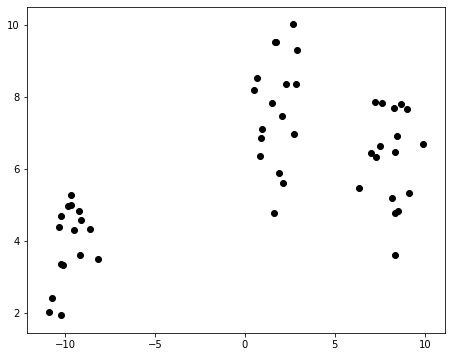

In [12]:
plot_data(X)

NOTE:
 + and Yellow Circle -> Initial Centroid
 * andBlack Circle -> Final Centroid


Initial Plot:



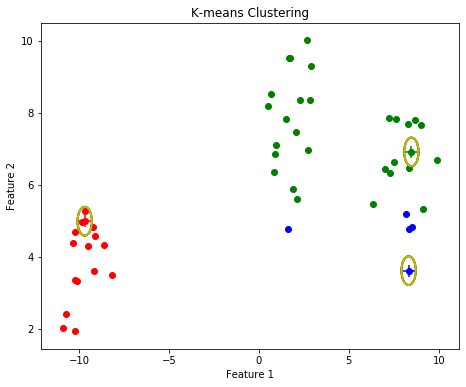


Initial Cluster Centers:

[array([-9.68674231,  4.98407665]), array([8.32405183, 3.6123843 ]), array([8.47764867, 6.90996676])]

Final Cluster Centers:

[[-9.74449743  3.90580472]
 [ 8.12972553  6.31999593]
 [ 1.75170244  7.68208961]]


Final Plot:



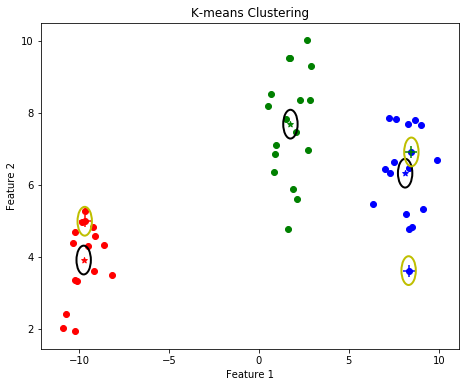

In [13]:
#Final plot and the final cluster centres are at the end
#by default show_type is set to 'all', to get only initial and final plot, set show_type to 'ini_fin'
cluster,centroid = k_means(X,k,show_type='ini_fin')

In [14]:
validate(original_clus,cluster,k)

Both the clusters are equal


#### VALIDATION

In [15]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

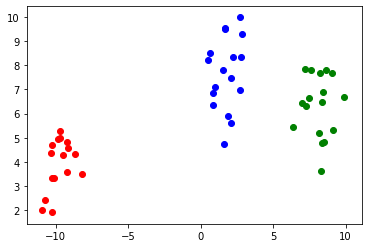

In [16]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],c='blue')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],c='red')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],c='green')
plt.show()

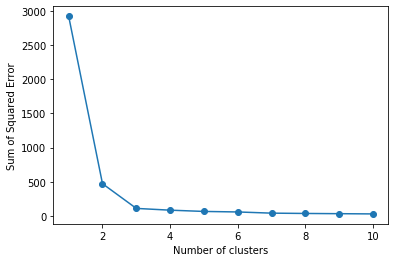

In [17]:
sse = []
k=range(1, 11)
for i in k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(k, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Error')
plt.show()